<a href="https://colab.research.google.com/github/rk-ka/ML2020/blob/master/Dota2-final_statement_Review2_RomanKuchukov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Финальное задание**
Роман Кучуков - 13.09.2020


# Загрузка данных

In [ ]:
# connect Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import sklearn

import time
import datetime


In [ ]:
#LOAD DATA FROM GOOGLE DRIVE

import os
data_path = '/content/drive/My Drive/ML/ML2020_data/final'


file_name1 = 'final_features.csv'
dataFilePath1 = os.path.join(data_path, file_name1)
print(dataFilePath1)


file_name2 = 'final_features_test.csv'
dataFilePath2 = os.path.join(data_path, file_name2)
print(dataFilePath2)


/content/drive/My Drive/ML/ML2020_data/final/final_features.csv
/content/drive/My Drive/ML/ML2020_data/final/final_features_test.csv


In [ ]:
fts_csv = pd.read_csv(dataFilePath1, header=[0])  #исходня табл. признаков (обучающая)

fts_csv # LOOK 
# 97230 rows × 109 columns

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,...,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
0,0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,...,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,2874,1,1796,0,51,0
1,1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,...,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,2463,1,1974,0,63,1
2,2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,...,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,2130,0,0,1830,0,63
3,3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,...,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,1459,0,1920,2047,50,63
4,4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,...,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,2449,0,4,1974,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,114402,1450265551,1,47,4,1706,1198,17,0,1,8,7,2,616,535,0,0,2,10,1,3,879,1798,22,1,1,9,21,4,1835,1350,11,1,1,9,71,3,604,567,1,...,972,847,1,1,1,11,28,3,1583,1634,10,2,0,6,114.0,0.0,2.0,8.0,245.0,-86.0,211.0,5,2,1,0,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0,2032,0,1792,1975,48,63
97226,114403,1450277704,0,43,4,1793,1416,17,0,1,5,26,3,764,800,0,1,0,9,4,3,1130,1585,20,1,1,14,29,4,1546,1166,8,1,0,6,110,3,892,541,1,...,1260,1008,4,1,1,12,98,5,1791,1186,3,1,0,8,174.0,1.0,9.0,4.0,139.0,-85.0,202.0,5,3,2,0,-5.0,NaN,-82.0,NaN,4,3,2,0,-17.0,1734,1,2038,6,63,3
97227,114404,1450291848,1,98,4,1399,540,1,0,0,5,11,4,1448,1371,17,0,1,13,112,3,658,646,2,0,0,10,81,4,1710,1833,24,1,0,10,50,2,364,674,1,...,1778,1614,27,0,0,8,31,3,841,499,1,0,0,10,108.0,0.0,3.0,5.0,43.0,-83.0,181.0,2,4,4,2,-32.0,249.0,-70.0,NaN,1,1,3,1,-15.0,2906,0,1796,1846,51,63
97228,114405,1450292986,1,100,3,1135,766,6,0,2,6,72,5,1954,1457,22,0,0,9,79,2,471,634,2,0,1,10,20,1,265,605,1,0,0,9,39,5,2043,1738,18,...,1715,1195,10,1,0,8,106,4,1264,803,5,0,0,8,28.0,0.0,4.0,6.0,96.0,-78.0,205.0,6,3,3,0,-21.0,254.0,-85.0,183.0,5,3,3,1,-42.0,951,0,2039,2047,63,63


In [ ]:
fts_tst = pd.read_csv(dataFilePath2, header=[0]) #исходня табл. признаков (тестовая)


fts_tst # LOOK  
# 17177 rows × 103 columns

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,...,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,6,1430287923,0,93,4,1103,1089,8,0,1,9,102,3,1183,963,9,0,2,9,52,5,2289,2043,20,2,0,6,53,3,917,1006,14,0,0,6,57,3,1344,933,3,...,2,1,0,9,29,3,1091,918,6,0,1,8,39,5,1674,1048,12,0,1,7,1.0,0.0,2.0,NaN,72.0,-82.0,NaN,2,2,3,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
1,7,1430293357,1,20,2,556,570,1,0,0,9,6,4,1194,1386,21,0,0,7,65,4,1374,1064,13,0,1,8,92,2,774,737,0,1,0,8,43,5,2254,1787,24,...,19,0,0,14,99,3,1075,718,3,0,1,7,5,4,1130,994,1,1,0,10,84.0,1.0,9.0,NaN,138.0,-82.0,233.0,2,6,2,2,-29.0,168.0,-54.0,NaN,3,2,2,1,16.0
2,10,1430301774,1,112,2,751,808,1,0,0,13,26,2,421,569,3,0,0,6,29,3,960,896,3,1,2,6,11,5,1877,1511,23,0,0,8,41,4,1581,1593,26,...,12,0,0,8,49,5,2434,1917,22,0,0,9,54,4,1372,2005,24,2,1,11,168.0,1.0,9.0,NaN,33.0,-88.0,NaN,5,4,3,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
3,13,1430323933,1,27,3,708,903,1,1,1,11,91,2,672,901,6,0,0,8,74,5,2141,1626,28,0,0,7,52,4,1579,2169,28,2,0,7,2,5,1960,1668,27,...,22,0,0,7,62,2,536,692,0,1,1,6,49,4,1815,1424,18,0,0,5,55.0,0.0,3.0,NaN,208.0,-78.0,180.0,4,2,2,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
4,16,1430331112,1,39,4,1259,661,4,0,0,9,93,5,1703,964,10,0,1,6,30,3,1099,942,2,1,0,6,85,3,1285,1013,10,0,0,8,102,2,484,609,4,...,19,0,0,10,3,3,623,520,1,0,0,10,96,5,1884,1409,15,0,1,11,285.0,1.0,5.0,NaN,225.0,-76.0,NaN,1,3,2,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17172,114369,1450212780,7,11,5,2054,1941,27,0,1,8,28,4,1460,936,7,0,1,8,89,3,1208,1579,22,0,1,13,20,2,464,816,1,0,1,10,86,3,576,932,3,...,19,4,0,9,74,4,2042,1287,12,0,0,5,37,3,1143,742,5,0,0,8,27.0,1.0,7.0,1.0,110.0,-84.0,180.0,5,3,4,1,8.0,253.0,-87.0,NaN,4,3,2,1,-33.0
17173,114377,1450222875,1,3,3,748,605,1,0,0,12,22,3,1130,1385,16,1,0,9,60,3,779,660,0,0,0,8,11,4,1463,1362,18,0,0,8,8,4,1549,1479,24,...,18,0,0,7,31,3,633,500,0,0,0,10,72,4,1197,1245,18,0,1,8,147.0,1.0,5.0,4.0,NaN,-82.0,182.0,2,4,2,1,-1.0,133.0,-85.0,184.0,2,3,4,1,-18.0
17174,114378,1450223593,1,85,2,575,499,0,0,0,8,102,3,697,686,3,0,0,8,75,5,2050,980,8,0,1,8,39,3,853,1014,13,0,1,6,47,4,1325,1390,21,...,2,1,0,10,98,5,1622,1684,22,1,0,10,34,5,2104,1963,25,1,0,8,4.0,1.0,7.0,3.0,NaN,-84.0,182.0,4,2,2,0,20.0,133.0,-88.0,239.0,4,4,4,0,-36.0
17175,114393,1450244771,0,7,4,1844,1176,8,1,2,8,32,3,1013,841,6,0,0,7,17,5,1920,1260,16,0,0,6,64,3,626,500,0,0,0,8,31,3,758,540,1,...,12,0,0,6,112,3,915,657,1,0,0,9,2,3,1039,1470,15,1,0,3,129.0,1.0,9.0,4.0,164.0,-84.0,279.0,2,2,2,0,-28.0,NaN,-83.0,NaN,1,4,1,0,NaN


# Работа с признаками

In [ ]:
fts_csv.sample(5) #random 5 sample

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,...,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
39222,46143,1444347756,7,56,5,1967,1149,12,0,2,9,27,1,855,1147,3,1,0,11,26,4,1128,984,1,1,0,8,94,3,1104,1494,13,1,0,7,96,4,1597,1097,14,...,1315,913,6,0,2,8,25,6,2645,2164,20,2,1,6,NaN,NaN,NaN,NaN,NaN,-78.0,206.0,3,4,3,1,99.0,7.0,-83.0,276.0,2,3,2,0,-15.0,2308,0,0,1974,0,63
5584,6603,1433039354,1,39,5,1781,1299,17,0,0,8,87,3,714,736,6,0,0,7,20,3,732,764,7,0,0,6,97,3,1046,703,5,0,0,4,1,4,1401,1795,24,...,740,500,0,0,0,8,17,5,1852,1370,21,0,0,9,128.0,0.0,4.0,NaN,71.0,-83.0,194.0,0,5,3,1,-36.0,109.0,-81.0,186.0,2,3,2,0,-41.0,2410,0,1536,1972,0,63
38796,45640,1444290607,7,36,3,1159,1252,14,1,1,7,11,6,2446,1961,28,0,0,13,68,2,529,649,2,0,0,7,40,2,490,552,0,0,1,11,69,5,2638,2643,19,...,488,591,1,0,0,7,59,4,1300,1593,18,1,0,8,NaN,NaN,NaN,NaN,149.0,-80.0,191.0,3,3,2,1,-22.0,NaN,-64.0,273.0,7,5,3,1,12.0,2819,1,1975,0,63,0
56059,65897,1447185917,1,85,3,842,686,2,0,0,10,50,2,702,873,1,1,0,10,106,5,2043,1528,20,0,0,6,75,5,2102,1406,20,0,0,6,100,3,708,1674,20,...,689,720,4,0,0,10,12,3,790,1179,14,1,1,4,129.0,0.0,4.0,7.0,132.0,-84.0,180.0,2,4,3,0,11.0,94.0,-84.0,267.0,1,2,2,1,-26.0,1073,1,2047,1798,63,51
13851,16338,1436728765,7,97,5,2014,1549,22,0,0,8,45,2,430,590,2,0,1,10,25,5,2065,1417,19,0,0,10,7,2,720,572,0,0,0,8,4,3,810,1275,13,...,994,1266,15,0,1,11,51,5,2059,1510,24,0,0,10,-5.0,1.0,6.0,NaN,122.0,-84.0,272.0,6,3,2,1,14.0,135.0,-88.0,228.0,2,4,3,2,-20.0,3119,1,1972,256,63,48


In [ ]:
# Индекс заголовков признаков
list_col = [(i, j) for i, j in enumerate(fts_csv.columns)]

# [104, 'radiant_win'] целевой столбец

In [ ]:
# вывод столбцов как в тестовой выборке
list_col_tst = [i for i in fts_tst.columns] #столбцы тестовые данные

#Фильтруем обуч. выборку по тестовым столбцам
fts_0 = fts_csv[list_col_tst] # 97230 rows × 103 columns
fts_0

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,...,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,0,1430198770,7,11,5,2098,1489,20,0,0,7,67,3,842,991,10,0,0,4,29,5,1909,1143,10,0,0,8,20,3,757,741,6,0,0,7,105,3,732,658,4,...,23,0,0,6,37,3,742,500,2,0,0,8,84,3,958,1003,3,1,0,9,7.0,1.0,9.0,NaN,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1,1430220345,0,42,4,1188,1033,9,0,1,12,49,4,1596,993,10,0,1,7,67,4,1506,1502,18,1,0,7,37,3,669,631,7,0,0,7,26,2,415,539,1,...,2,2,0,12,7,2,440,583,0,0,0,7,12,4,1470,1622,24,0,0,9,54.0,1.0,7.0,NaN,173.0,-80.0,NaN,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,2,1430227081,7,33,4,1319,1270,22,0,0,12,98,3,1314,775,6,0,0,6,20,3,1297,909,0,1,0,6,27,5,2360,2096,26,1,1,6,4,3,1395,1627,27,...,3,0,0,8,29,4,1319,667,4,0,0,7,80,3,1350,1512,25,0,0,7,224.0,0.0,3.0,NaN,63.0,-82.0,NaN,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,...,11,0,0,7,102,2,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,4,1430282290,7,13,4,1431,1090,8,1,0,8,27,2,629,552,0,0,1,7,30,3,884,927,0,1,0,8,72,3,925,1439,16,1,0,11,93,4,1482,880,7,...,1,0,0,9,25,5,1815,1275,18,0,0,8,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,NaN,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,114402,1450265551,1,47,4,1706,1198,17,0,1,8,7,2,616,535,0,0,2,10,1,3,879,1798,22,1,1,9,21,4,1835,1350,11,1,1,9,71,3,604,567,1,...,18,0,1,9,3,3,972,847,1,1,1,11,28,3,1583,1634,10,2,0,6,114.0,0.0,2.0,8.0,245.0,-86.0,211.0,5,2,1,0,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0
97226,114403,1450277704,0,43,4,1793,1416,17,0,1,5,26,3,764,800,0,1,0,9,4,3,1130,1585,20,1,1,14,29,4,1546,1166,8,1,0,6,110,3,892,541,1,...,1,0,1,6,20,4,1260,1008,4,1,1,12,98,5,1791,1186,3,1,0,8,174.0,1.0,9.0,4.0,139.0,-85.0,202.0,5,3,2,0,-5.0,NaN,-82.0,NaN,4,3,2,0,-17.0
97227,114404,1450291848,1,98,4,1399,540,1,0,0,5,11,4,1448,1371,17,0,1,13,112,3,658,646,2,0,0,10,81,4,1710,1833,24,1,0,10,50,2,364,674,1,...,16,1,0,8,59,4,1778,1614,27,0,0,8,31,3,841,499,1,0,0,10,108.0,0.0,3.0,5.0,43.0,-83.0,181.0,2,4,4,2,-32.0,249.0,-70.0,NaN,1,1,3,1,-15.0
97228,114405,1450292986,1,100,3,1135,766,6,0,2,6,72,5,1954,1457,22,0,0,9,79,2,471,634,2,0,1,10,20,1,265,605,1,0,0,9,39,5,2043,1738,18,...,2,1,0,10,28,5,1715,1195,10,1,0,8,106,4,1264,803,5,0,0,8,28.0,0.0,4.0,6.0,96.0,-78.0,205.0,6,3,3,0,-21.0,254.0,-85.0,183.0,5,3,3,1,-42.0


In [ ]:
#Целевая переменная
y = fts_csv[fts_csv.columns[104]]

In [ ]:
# Ищем пропуски - фильтруем фрейм по количеству данных, меньше полного (97230)

list_errCol = [] #имена неполных столбцов

for i, j in enumerate(fts_0.count().items()):
  if j[1] != 97230:
    print (i, j) # 54 ('d2_gold', 97230)
    list_errCol.append(j[0])


83 ('first_blood_time', 77677)
84 ('first_blood_team', 77677)
85 ('first_blood_player1', 77677)
86 ('first_blood_player2', 53243)
87 ('radiant_bottle_time', 81539)
88 ('radiant_courier_time', 96538)
89 ('radiant_flying_courier_time', 69751)
94 ('radiant_first_ward_time', 95394)
95 ('dire_bottle_time', 81087)
96 ('dire_courier_time', 96554)
97 ('dire_flying_courier_time', 71132)
102 ('dire_first_ward_time', 95404)


In [ ]:
#Посмотрим на неполные данные
#Выведем матчи(строки) с неполными данными

filter_84 = fts_0[ fts_0.columns[84] ].isna() # Detect missing values 'first_blood_team' col.84
fts_csv.loc[filter_84] # фильтрация и вывод отфильтрованных строк


,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,...,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
3,3,1430263531,1,29,4,1779,1056,14,0,0,5,30,2,539,539,1,0,0,6,75,5,2037,1139,15,0,0,6,37,2,591,499,0,0,0,6,41,3,712,1075,12,...,674,537,1,0,0,7,20,2,510,499,0,0,0,7,NaN,NaN,NaN,NaN,208.0,-75.0,NaN,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,1459,0,1920,2047,50,63
7,9,1430299335,7,35,5,2117,1252,16,0,0,6,15,3,1378,1430,23,0,0,4,83,2,259,500,0,0,0,6,29,3,825,818,8,0,0,8,101,2,357,500,0,...,1387,1275,19,0,0,7,96,4,1408,883,8,0,0,7,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,1,2,2,1,26.0,119.0,-61.0,NaN,2,3,4,0,-15.0,4079,1,1540,0,63,0
33,45,1430380471,1,88,2,510,619,6,0,0,6,11,5,2135,1985,32,0,0,9,30,1,647,695,7,0,0,9,110,2,619,657,4,0,1,5,17,5,1793,1806,30,...,1742,1861,28,0,0,13,51,4,1634,991,12,0,0,6,NaN,NaN,NaN,NaN,109.0,-86.0,200.0,2,3,3,0,-19.0,59.0,-88.0,186.0,1,5,2,1,-17.0,2338,0,1542,1972,51,63
39,51,1430385982,7,101,2,548,612,0,0,0,5,30,1,193,550,3,0,0,7,99,5,1812,1325,18,0,0,9,12,4,1694,1478,25,0,0,11,90,3,742,701,5,...,1863,1167,16,0,0,6,57,3,908,537,1,0,0,4,NaN,NaN,NaN,NaN,153.0,-87.0,190.0,2,1,2,1,-24.0,NaN,-82.0,208.0,2,3,2,1,-3.0,3419,0,0,1792,0,48
65,86,1430422361,1,12,4,1493,1736,28,0,0,6,26,1,124,500,0,0,0,6,110,2,576,500,0,0,0,10,35,5,1902,1146,15,0,0,6,99,3,968,704,5,...,2383,2821,26,0,0,6,84,3,619,589,3,0,0,9,NaN,NaN,NaN,NaN,197.0,-85.0,218.0,1,1,2,0,16.0,5.0,-78.0,211.0,2,4,2,0,-5.0,3588,1,1844,0,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97075,114234,1450148213,1,106,4,1868,1489,13,1,0,8,20,2,614,551,2,0,0,10,71,3,752,811,2,0,0,9,55,3,1003,944,11,0,0,6,72,4,1675,1291,19,...,1088,837,3,0,0,9,60,3,868,1164,15,0,0,9,NaN,NaN,NaN,NaN,197.0,-76.0,NaN,2,3,3,1,-13.0,135.0,-86.0,181.0,3,4,1,0,-11.0,2636,0,0,1844,0,63
97111,114274,1450158766,1,71,3,643,583,2,0,0,4,50,3,614,574,1,0,0,5,21,5,1910,1440,17,0,0,7,72,4,1455,1107,14,0,0,10,110,3,805,742,6,...,1624,1363,21,0,0,7,51,4,1500,889,9,0,0,8,NaN,NaN,NaN,NaN,131.0,-78.0,NaN,1,4,1,0,27.0,156.0,-83.0,187.0,0,3,3,0,45.0,2207,0,0,1983,0,63
97135,114300,1450166373,1,25,2,974,577,1,0,0,5,11,4,1755,1780,28,0,0,8,60,3,501,951,11,0,0,6,7,3,877,584,2,0,0,7,8,5,2131,1325,20,...,913,538,1,0,0,9,73,4,1365,2716,22,0,0,5,NaN,NaN,NaN,NaN,165.0,-72.0,NaN,0,4,1,0,82.0,4.0,-87.0,257.0,1,3,2,1,-21.0,2827,1,1975,1024,63,0
97136,114301,1450166735,1,50,1,390,500,0,0,0,9,74,4,1706,1021,9,0,0,7,72,4,1402,1317,20,0,0,8,29,4,1264,704,5,0,0,8,75,2,512,608,1,...,985,822,4,0,0,7,42,3,985,1176,13,0,0,5,NaN,NaN,NaN,NaN,NaN,-87.0,199.0,4,2,3,1,-57.0,205.0,-38.0,NaN,1,5,2,0,-23.0,2697,1,1844,1540,63,3


In [ ]:
#Обнулим пропуски значений NaN
#зададим целевую переменную X

fts_00 = fts_0.fillna(0)


# 1. Градиеннтный бустинг

In [ ]:
"""K-Folds кросс-валидация - функция"""

from sklearn.model_selection import KFold

def Kfold (X):
  # K-Folds cross-validator
  n_folds = 5

  kf = KFold(n_splits=n_folds, shuffle=True)
  kf.get_n_splits(X)

  return kf.split(X)



In [ ]:
# цикл классификаторов - Град. Бустинг
from sklearn.ensemble import GradientBoostingClassifier

X = fts_00

#число деревьев 10, 20, 30
num_trees = [10, 20, 30, 40, 50, 100]

#K-fold class
#перебор числа деревьев num_trees


score_list = [] #find max score
max_dict = {} 
time_dict = {}


for n in num_trees:
  
  print("\nTrees:", n) #пробегаем знач.числа деревьев 
  k=1 # KFold

  mean_sc = np.zeros(0) #np array scores
  start_time = datetime.datetime.now() #TIMER ON

  for train_index, test_index in Kfold(X):

    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  
    y_train, y_test = y[train_index], y[test_index]
  
    
    clf = GradientBoostingClassifier(n_estimators=n, random_state=241, verbose=False)
    clf.fit(X_train, y_train)

    pred = clf.predict_proba(X_test)[:, 1] #оценка вер. принадл. к 1 классу

    #score
    score = roc_auc_score(y_test, pred)
    print('k-fold', k, "score", score)
    score_list.append(score)
    mean_sc = np.append(mean_sc, score)

    k +=1 

  #timing
  time_el =  datetime.datetime.now() - start_time  #TIMER OFF
  time_dict[n] = time_el.total_seconds() #time in seconds
  print ('Time elapsed:', time_el) 
  
  max_dict[n] = np.mean(mean_sc)
  print("ROC score mean=", round(np.mean(mean_sc), 4))


print("\nScores mean")
#select the best param
sorted(max_dict.items(), key=lambda kv: kv[1])




Trees: 10
k-fold 1 score 0.6641389874222662
k-fold 2 score 0.6663989113863547
k-fold 3 score 0.6649873668924844
k-fold 4 score 0.6673803613383809
k-fold 5 score 0.6630208680268446
Time elapsed: 0:01:00.473271
ROC score mean= 0.6652

Trees: 20
k-fold 1 score 0.6818864553947577
k-fold 2 score 0.6798695516157973
k-fold 3 score 0.6776310512168375
k-fold 4 score 0.6825687149025039
k-fold 5 score 0.6876377494408021
Time elapsed: 0:01:56.121722
ROC score mean= 0.6819

Trees: 30
k-fold 1 score 0.6815321199947858
k-fold 2 score 0.6949748584100048
k-fold 3 score 0.6894819987047691
k-fold 4 score 0.6905782825129311
k-fold 5 score 0.6862668343186014
Time elapsed: 0:02:55.372275
ROC score mean= 0.6886

Trees: 40
k-fold 1 score 0.693780849794276
k-fold 2 score 0.6969803908465235
k-fold 3 score 0.6932148308080998
k-fold 4 score 0.6932802253104445
k-fold 5 score 0.6924013820705845
Time elapsed: 0:03:51.557125
ROC score mean= 0.6939

Trees: 50
k-fold 1 score 0.696232647430078
k-fold 2 score 0.70421751

[(10, 0.6651852990132662),
 (20, 0.6819187045141397),
 (30, 0.6885668187882183),
 (40, 0.6939315357659858),
 (50, 0.6970699639651133),
 (100, 0.7065534249266006)]

max_dict {10: 0.6651852990132662, 20: 0.6819187045141397, 30: 0.6885668187882183, 40: 0.6939315357659858, 50: 0.6970699639651133, 100: 0.7065534249266006} 

time_dict {10: 60.473271, 20: 116.121722, 30: 175.372275, 40: 231.557125, 50: 295.139969, 100: 572.685072} 



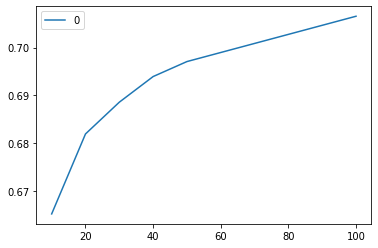

In [ ]:
print('max_dict', max_dict, '\n')
print('time_dict', time_dict, '\n')

#Plot learning curve
pd.DataFrame.from_dict(max_dict, orient='index').plot()

# **ОТЧЕТ - Градиентный бустинг** 


В отчете по данному этапу вы должны ответить на следующие вопросы:

***1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?***





```
# Список признаков с пропусками:

83 ('first_blood_time', 77677)
84 ('first_blood_team', 77677)
85 ('first_blood_player1', 77677)
86 ('first_blood_player2', 53243)
87 ('radiant_bottle_time', 81539)
88 ('radiant_courier_time', 96538)
89 ('radiant_flying_courier_time', 69751)
94 ('radiant_first_ward_time', 95394)
95 ('dire_bottle_time', 81087)
96 ('dire_courier_time', 96554)
97 ('dire_flying_courier_time', 71132)
102 ('dire_first_ward_time', 95404)
```

Пропуски у в признаках 'first_blood_time', 'first_blood_team' объясняются тем, что команды не совершили действие 'first_blood' за первые 5 минут игры.

Пропуски у в признаке 'radiant_bottle_time' объясняются тем, что команда не воспользовалась предметом в первые 5 минут игры.


***2. Как называется столбец, содержащий целевую переменную?***

'radiant_win'

***3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.***

2 мин 55 сек при среднем качестве AUC-ROC 0.689


***4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?***

Да, имеет смысл. При количестве деревьев более 30 продолжается рост качества, но при этом заметно увеличивается время для обучения.
Например, при 30 деревьях достигается качество 0.689 за 2 минуты 55 секунд,
при 100 деревьях достигается качество 0.706 за 9 минут 32 секунды.

Чтобы ускорить обучение можно воспользоваться алгоритмами понижения размерности обучающей выборки, например методом главных компонент, а также уменьшить глубину решающих деревьев.



# 2. Логистическая регрессия

In [ ]:
"""Масштабирование признаков - функция"""

from sklearn.preprocessing import StandardScaler

def Scale(X):
  scaler = StandardScaler()
  scaler.fit(X)
  StandardScaler(copy=True, with_mean=True, with_std=True)
  X_t = scaler.transform(X)
  return X_t



In [ ]:
"""Лог. Регрессия - функция"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


def LogReg(X, c):
  mean_sc = np.zeros(0) #np array scores
  for train_index, test_index in Kfold(X):

    X_train, X_test = X[train_index], X[test_index]  
    y_train, y_test = y[train_index], y[test_index]
    
    # Classification
    clf = LogisticRegression(random_state=1, C=c)
    clf.fit(X_train, y_train)

    pred = clf.predict_proba(X_test)[:, 1] #оценка вер. принадл. к 1 классу

    score = roc_auc_score(y_test, pred)
    mean_sc = np.append(mean_sc, score)
  return mean_sc

In [ ]:
# Лог. Регрессия - 1: признаки как есть
print("# Лог. Регрессия - 1: признаки как есть")
from sklearn.linear_model import LogisticRegression


#Масштабирование признаков
X = Scale(fts_00)

#С - значения
C_list = np.power(10.0, np.arange(-3, 3))

max_dict = {} 
time_dict = {}

for c in C_list:
  
  print("\nC:", c) #пробегаем знач. C
  start_time = datetime.datetime.now() #TIMER ON

  # Лог. регрессия функция
  mean_sc = LogReg(X, c)

  #timing
  time_el =  datetime.datetime.now() - start_time #TIMER OFF
  print ('Time elapsed:', time_el) 
  time_dict[c] = time_el.total_seconds() #time in seconds
  
  max_dict[c] = [round(np.mean(mean_sc), 4), round(time_el.total_seconds(), 2)]
  print("ROC score mean=", round(np.mean(mean_sc), 4))

    
print("\nScores mean")
#select the best param C 
sorted(max_dict.items(), key=lambda kv: kv[1])


C: 0.001
Time elapsed: 0:00:04.402161
ROC score mean= 0.7163

C: 0.01
Time elapsed: 0:00:06.145910
ROC score mean= 0.7165

C: 0.1
Time elapsed: 0:00:06.394444
ROC score mean= 0.7164

C: 1.0
Time elapsed: 0:00:06.712712
ROC score mean= 0.7164

C: 10.0
Time elapsed: 0:00:06.607059
ROC score mean= 0.7164

C: 100.0
Time elapsed: 0:00:06.478403
ROC score mean= 0.7164

Scores mean


[(0.001, [0.7163, 4.4]),
 (0.1, [0.7164, 6.39]),
 (100.0, [0.7164, 6.48]),
 (10.0, [0.7164, 6.61]),
 (1.0, [0.7164, 6.71]),
 (0.01, [0.7165, 6.15])]

In [ ]:
"""
Лог.рег. 1: лучший результат:
С=0.01, ROC score = 0.7165, time = 06.15 секунды 
"""


In [ ]:
# Уберем катигориальные признаки (героев)


list_col_log = [(i, j) for i, j in enumerate(fts_00.columns)]
list_col_log 

list_col_nCat = []
list_col_hero = []

cat_no = [0, 1, 2, 3, 11, 19, 27, 35, 43, 51, 59, 67, 75] #номера категор. столбцов

for kat in list_col_log:
  if kat[0] not in cat_no:
    list_col_nCat.append(kat[1])
  else:
    list_col_hero.append(kat[1])

list_col_nCat  #список столбцов без категориальных
list_col_hero = list_col_hero[3:] #список столбцов героев

In [ ]:
#Таблица без категориальных признаков

fts_noCat = fts_00[list_col_nCat]
fts_noCat

,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,...,d3_xp,d3_gold,d3_lh,d3_kills,d3_deaths,d3_items,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,5,2098,1489,20,0,0,7,3,842,991,10,0,0,4,5,1909,1143,10,0,0,8,3,757,741,6,0,0,7,3,732,658,4,0,1,11,3,1058,996,12,0,...,2052,1536,23,0,0,6,3,742,500,2,0,0,8,3,958,1003,3,1,0,9,7.0,1.0,9.0,0.0,134.0,-80.0,244.0,2,2,2,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,4,1188,1033,9,0,1,12,4,1596,993,10,0,1,7,4,1506,1502,18,1,0,7,3,669,631,7,0,0,7,2,415,539,1,0,0,5,5,1960,1384,16,0,...,720,1350,2,2,0,12,2,440,583,0,0,0,7,4,1470,1622,24,0,0,9,54.0,1.0,7.0,0.0,173.0,-80.0,0.0,2,0,2,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,4,1319,1270,22,0,0,12,3,1314,775,6,0,0,6,3,1297,909,0,1,0,6,5,2360,2096,26,1,1,6,3,1395,1627,27,0,0,9,5,2305,2028,19,1,...,755,620,3,0,0,8,4,1319,667,4,0,0,7,3,1350,1512,25,0,0,7,224.0,0.0,3.0,0.0,63.0,-82.0,0.0,2,5,2,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,4,1779,1056,14,0,0,5,2,539,539,1,0,0,6,5,2037,1139,15,0,0,6,2,591,499,0,0,0,6,3,712,1075,12,0,0,6,5,1878,1174,17,0,...,1681,1051,11,0,0,7,2,674,537,1,0,0,7,2,510,499,0,0,0,7,0.0,0.0,0.0,0.0,208.0,-75.0,0.0,0,3,2,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,4,1431,1090,8,1,0,8,2,629,552,0,0,1,7,3,884,927,0,1,0,8,3,925,1439,16,1,0,11,4,1482,880,7,0,0,8,3,704,586,1,0,...,1055,638,1,0,0,9,5,1815,1275,18,0,0,8,4,1119,904,6,0,1,7,-21.0,1.0,6.0,0.0,166.0,-81.0,181.0,1,4,2,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,4,1706,1198,17,0,1,8,2,616,535,0,0,2,10,3,879,1798,22,1,1,9,4,1835,1350,11,1,1,9,3,604,567,1,0,1,5,3,887,1023,0,1,...,1637,1339,18,0,1,9,3,972,847,1,1,1,11,3,1583,1634,10,2,0,6,114.0,0.0,2.0,8.0,245.0,-86.0,211.0,5,2,1,0,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0
97226,4,1793,1416,17,0,1,5,3,764,800,0,1,0,9,3,1130,1585,20,1,1,14,4,1546,1166,8,1,0,6,3,892,541,1,0,1,4,3,966,1303,17,0,...,308,581,1,0,1,6,4,1260,1008,4,1,1,12,5,1791,1186,3,1,0,8,174.0,1.0,9.0,4.0,139.0,-85.0,202.0,5,3,2,0,-5.0,0.0,-82.0,0.0,4,3,2,0,-17.0
97227,4,1399,540,1,0,0,5,4,1448,1371,17,0,1,13,3,658,646,2,0,0,10,4,1710,1833,24,1,0,10,2,364,674,1,0,0,11,3,1300,827,8,0,...,1069,1492,16,1,0,8,4,1778,1614,27,0,0,8,3,841,499,1,0,0,10,108.0,0.0,3.0,5.0,43.0,-83.0,181.0,2,4,4,2,-32.0,249.0,-70.0,0.0,1,1,3,1,-15.0
97228,3,1135,766,6,0,2,6,5,1954,1457,22,0,0,9,2,471,634,2,0,1,10,1,265,605,1,0,0,9,5,2043,1738,18,1,0,11,4,1352,1427,20,0,...,834,869,2,1,0,10,5,1715,1195,10,1,0,8,4,1264,803,5,0,0,8,28.0,0.0,4.0,6.0,96.0,-78.0,205.0,6,3,3,0,-21.0,254.0,-85.0,183.0,5,3,3,1,-42.0


In [ ]:
# Лог. Регрессия - 2: без кат. признаков
print("# Лог. Регрессия - 2: без кат. признаков")


#Масштабирование признаков
X = Scale(fts_noCat)

#С - значения
C_list = np.power(10.0, np.arange(-3, 3))

max_dict = {} 
time_dict = {}

for c in C_list:
  
  print("\nC:", c) #пробегаем знач. C
  start_time = datetime.datetime.now() #TIMER ON

  # Лог. регрессия функция
  mean_sc = LogReg(X, c)

  #timing
  time_el =  datetime.datetime.now() - start_time #TIMER OFF
  print ('Time elapsed:', time_el) 
  time_dict[c] = time_el.total_seconds() #time in seconds
  
  max_dict[c] = [round(np.mean(mean_sc), 4), round(time_el.total_seconds(), 2)]
  print("ROC score mean=", round(np.mean(mean_sc), 4))

    
print("\nScores mean")
#select the best param C 
sorted(max_dict.items(), key=lambda kv: kv[1])

# Лог. Регрессия - 2: без кат. признаков

C: 0.001
Time elapsed: 0:00:04.030429
ROC score mean= 0.7163

C: 0.01
Time elapsed: 0:00:05.534890
ROC score mean= 0.7163

C: 0.1
Time elapsed: 0:00:05.912345
ROC score mean= 0.7162

C: 1.0
Time elapsed: 0:00:06.262789
ROC score mean= 0.7163

C: 10.0
Time elapsed: 0:00:06.004710
ROC score mean= 0.7164

C: 100.0
Time elapsed: 0:00:06.225204
ROC score mean= 0.7164

Scores mean


[(0.1, [0.7162, 5.91]),
 (0.001, [0.7163, 4.03]),
 (0.01, [0.7163, 5.53]),
 (1.0, [0.7163, 6.26]),
 (10.0, [0.7164, 6.0]),
 (100.0, [0.7164, 6.23])]

In [ ]:
"""
Без категориальных данных качество классификации осталось тем же
С = 100, 0.7164, 06.23 сек
"""

# Мешок слов - герои

In [ ]:
list_col_hero #столбцы героев
fts_H = fts_00[list_col_hero]
fts_H 

,r1_hero,r2_hero,r3_hero,r4_hero,r5_hero,d1_hero,d2_hero,d3_hero,d4_hero,d5_hero
0,11,67,29,20,105,4,42,21,37,84
1,42,49,67,37,26,39,88,79,7,12
2,33,98,20,27,4,22,66,86,29,80
3,29,30,75,37,41,96,48,15,102,20
4,13,27,30,72,93,26,69,22,25,8
...,...,...,...,...,...,...,...,...,...,...
97225,47,7,1,21,71,26,19,93,3,28
97226,43,26,4,29,110,72,75,5,20,98
97227,98,11,112,81,50,28,39,55,59,31
97228,100,72,79,20,39,59,9,50,28,106


In [ ]:
# Определяем использование героев
hero_arr = pd.Series(data= fts_H.to_numpy().flatten())
hero_count = hero_arr.value_counts()
hero_count #108 используемых

hero_arr.max() #112 максимальный индекс героя

112

In [ ]:
# Кодирование "мешок слов"
# N — количество различных героев в выборке
N = 112
data = fts_00

X_pick = np.zeros((data.shape[0], N)) #(97230, 112)
print(X_pick.shape)
 
for i, match_id in enumerate(data.index):
    for p in range(5):
        X_pick[i, data.loc[match_id,'r{}_hero'.format(p+1)]-1] = 1
        X_pick[i, data.loc[match_id,'d{}_hero'.format(p+1)]-1] = -1

(97230, 112)


In [ ]:
#Мешок героев :)
X_pick #(97230, 112)

X_hero = pd.DataFrame(X_pick, index=data.index)
X_hero

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111
0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97226,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Объединение таблиц без кат. признаков и кодир. героев
fts_wH = pd.concat([fts_noCat, X_hero], axis=1)
fts_wH #97230 rows × 202 columns

,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_level,r5_xp,r5_gold,r5_lh,r5_kills,r5_deaths,r5_items,d1_level,d1_xp,d1_gold,d1_lh,d1_kills,...,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111
0,5,2098,1489,20,0,0,7,3,842,991,10,0,0,4,5,1909,1143,10,0,0,8,3,757,741,6,0,0,7,3,732,658,4,0,1,11,3,1058,996,12,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1188,1033,9,0,1,12,4,1596,993,10,0,1,7,4,1506,1502,18,1,0,7,3,669,631,7,0,0,7,2,415,539,1,0,0,5,5,1960,1384,16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1319,1270,22,0,0,12,3,1314,775,6,0,0,6,3,1297,909,0,1,0,6,5,2360,2096,26,1,1,6,3,1395,1627,27,0,0,9,5,2305,2028,19,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1779,1056,14,0,0,5,2,539,539,1,0,0,6,5,2037,1139,15,0,0,6,2,591,499,0,0,0,6,3,712,1075,12,0,0,6,5,1878,1174,17,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1431,1090,8,1,0,8,2,629,552,0,0,1,7,3,884,927,0,1,0,8,3,925,1439,16,1,0,11,4,1482,880,7,0,0,8,3,704,586,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97225,4,1706,1198,17,0,1,8,2,616,535,0,0,2,10,3,879,1798,22,1,1,9,4,1835,1350,11,1,1,9,3,604,567,1,0,1,5,3,887,1023,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97226,4,1793,1416,17,0,1,5,3,764,800,0,1,0,9,3,1130,1585,20,1,1,14,4,1546,1166,8,1,0,6,3,892,541,1,0,1,4,3,966,1303,17,0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97227,4,1399,540,1,0,0,5,4,1448,1371,17,0,1,13,3,658,646,2,0,0,10,4,1710,1833,24,1,0,10,2,364,674,1,0,0,11,3,1300,827,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97228,3,1135,766,6,0,2,6,5,1954,1457,22,0,0,9,2,471,634,2,0,1,10,1,265,605,1,0,0,9,5,2043,1738,18,1,0,11,4,1352,1427,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Лог. Регрессия - 3: с героями
print("# Лог. Регрессия - 3: с героями")

X = fts_wH

#Масштабирование признаков
X = Scale(X)

#С - значения
C_list = np.power(10.0, np.arange(-3, 3))

max_dict = {} 
time_dict = {}

for c in C_list:
  
  print("\nC:", c) #пробегаем знач. C
  start_time = datetime.datetime.now() #TIMER ON

  # Лог. регрессия функция
  mean_sc = LogReg(X, c)

  #timing
  time_el =  datetime.datetime.now() - start_time #TIMER OFF
  print ('Time elapsed:', time_el) 
  time_dict[c] = time_el.total_seconds() #time in seconds
  
  max_dict[c] = [round(np.mean(mean_sc), 4), round(time_el.total_seconds(), 2)]
  print("ROC score mean=", round(np.mean(mean_sc), 4))

    
print("\nScores mean")
#select the best param C 
sorted(max_dict.items(), key=lambda kv: kv[1])

# Лог. Регрессия - 3: с героями

C: 0.001
Time elapsed: 0:00:06.727351
ROC score mean= 0.7513

C: 0.01
Time elapsed: 0:00:10.021657
ROC score mean= 0.7519

C: 0.1
Time elapsed: 0:00:10.758006
ROC score mean= 0.7514

C: 1.0
Time elapsed: 0:00:11.050695
ROC score mean= 0.7516

C: 10.0
Time elapsed: 0:00:11.230836
ROC score mean= 0.7515

C: 100.0
Time elapsed: 0:00:11.274793
ROC score mean= 0.7516

Scores mean


[(0.001, [0.7513, 6.73]),
 (0.1, [0.7514, 10.76]),
 (10.0, [0.7515, 11.23]),
 (1.0, [0.7516, 11.05]),
 (100.0, [0.7516, 11.27]),
 (0.01, [0.7519, 10.02])]

In [ ]:
"""
Лог. Регрессия - 3: с героями
C = 0.01 , 0.7519, time = 10.02
"""

# ПРЕДСКАЗАНИЕ

In [ ]:
#Обучаем финальную модель

X = Scale(fts_wH)


model = LogisticRegression(C=0.01, random_state=42)
model.fit(X, y)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=True,
                   warm_start=False)

In [ ]:
#Трансформируем тестовую выборку

X_test = pd.DataFrame(fts_tst, index=fts_tst.index, columns=fts_tst.columns)

X_test.fillna(0, inplace=True) 

X_test_nCat = X_test[list_col_nCat] #без категор.
X_test_nCat # 17177 rows × 90 columns

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,r2_xp,r2_gold,r2_lh,r2_kills,r2_deaths,r2_items,r3_hero,r3_level,r3_xp,r3_gold,r3_lh,r3_kills,r3_deaths,r3_items,r4_hero,r4_level,r4_xp,r4_gold,r4_lh,r4_kills,r4_deaths,r4_items,r5_hero,r5_level,r5_xp,r5_gold,r5_lh,...,d3_lh,d3_kills,d3_deaths,d3_items,d4_hero,d4_level,d4_xp,d4_gold,d4_lh,d4_kills,d4_deaths,d4_items,d5_hero,d5_level,d5_xp,d5_gold,d5_lh,d5_kills,d5_deaths,d5_items,first_blood_time,first_blood_team,first_blood_player1,first_blood_player2,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_boots_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,6,1430287923,0,93,4,1103,1089,8,0,1,9,102,3,1183,963,9,0,2,9,52,5,2289,2043,20,2,0,6,53,3,917,1006,14,0,0,6,57,3,1344,933,3,...,2,1,0,9,29,3,1091,918,6,0,1,8,39,5,1674,1048,12,0,1,7,1.0,0.0,2.0,0.0,72.0,-82.0,0.0,2,2,3,0,12.0,247.0,-86.0,272.0,3,4,2,0,118.0
1,7,1430293357,1,20,2,556,570,1,0,0,9,6,4,1194,1386,21,0,0,7,65,4,1374,1064,13,0,1,8,92,2,774,737,0,1,0,8,43,5,2254,1787,24,...,19,0,0,14,99,3,1075,718,3,0,1,7,5,4,1130,994,1,1,0,10,84.0,1.0,9.0,0.0,138.0,-82.0,233.0,2,6,2,2,-29.0,168.0,-54.0,0.0,3,2,2,1,16.0
2,10,1430301774,1,112,2,751,808,1,0,0,13,26,2,421,569,3,0,0,6,29,3,960,896,3,1,2,6,11,5,1877,1511,23,0,0,8,41,4,1581,1593,26,...,12,0,0,8,49,5,2434,1917,22,0,0,9,54,4,1372,2005,24,2,1,11,168.0,1.0,9.0,0.0,33.0,-88.0,0.0,5,4,3,1,-22.0,46.0,-87.0,186.0,1,3,3,0,-34.0
3,13,1430323933,1,27,3,708,903,1,1,1,11,91,2,672,901,6,0,0,8,74,5,2141,1626,28,0,0,7,52,4,1579,2169,28,2,0,7,2,5,1960,1668,27,...,22,0,0,7,62,2,536,692,0,1,1,6,49,4,1815,1424,18,0,0,5,55.0,0.0,3.0,0.0,208.0,-78.0,180.0,4,2,2,2,-49.0,30.0,-89.0,210.0,3,4,2,1,-26.0
4,16,1430331112,1,39,4,1259,661,4,0,0,9,93,5,1703,964,10,0,1,6,30,3,1099,942,2,1,0,6,85,3,1285,1013,10,0,0,8,102,2,484,609,4,...,19,0,0,10,3,3,623,520,1,0,0,10,96,5,1884,1409,15,0,1,11,285.0,1.0,5.0,0.0,225.0,-76.0,0.0,1,3,2,0,36.0,180.0,-86.0,180.0,1,3,2,1,-33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17172,114369,1450212780,7,11,5,2054,1941,27,0,1,8,28,4,1460,936,7,0,1,8,89,3,1208,1579,22,0,1,13,20,2,464,816,1,0,1,10,86,3,576,932,3,...,19,4,0,9,74,4,2042,1287,12,0,0,5,37,3,1143,742,5,0,0,8,27.0,1.0,7.0,1.0,110.0,-84.0,180.0,5,3,4,1,8.0,253.0,-87.0,0.0,4,3,2,1,-33.0
17173,114377,1450222875,1,3,3,748,605,1,0,0,12,22,3,1130,1385,16,1,0,9,60,3,779,660,0,0,0,8,11,4,1463,1362,18,0,0,8,8,4,1549,1479,24,...,18,0,0,7,31,3,633,500,0,0,0,10,72,4,1197,1245,18,0,1,8,147.0,1.0,5.0,4.0,0.0,-82.0,182.0,2,4,2,1,-1.0,133.0,-85.0,184.0,2,3,4,1,-18.0
17174,114378,1450223593,1,85,2,575,499,0,0,0,8,102,3,697,686,3,0,0,8,75,5,2050,980,8,0,1,8,39,3,853,1014,13,0,1,6,47,4,1325,1390,21,...,2,1,0,10,98,5,1622,1684,22,1,0,10,34,5,2104,1963,25,1,0,8,4.0,1.0,7.0,3.0,0.0,-84.0,182.0,4,2,2,0,20.0,133.0,-88.0,239.0,4,4,4,0,-36.0
17175,114393,1450244771,0,7,4,1844,1176,8,1,2,8,32,3,1013,841,6,0,0,7,17,5,1920,1260,16,0,0,6,64,3,626,500,0,0,0,8,31,3,758,540,1,...,12,0,0,6,112,3,915,657,1,0,0,9,2,3,1039,1470,15,1,0,3,129.0,1.0,9.0,4.0,164.0,-84.0,279.0,2,2,2,0,-28.0,0.0,-83.0,0.0,1,4,1,0,0.0


In [ ]:
#Кодируем героев в тестовой выборке

# N — количество различных героев в выборке
N = 112
data = X_test

X_pick = np.zeros((data.shape[0], N)) #(97230, 109)
print(X_pick.shape)
 
for i, match_id in enumerate(data.index):
    for p in range(5):

        X_pick[i, data.loc[match_id,'d{}_hero'.format(p+1)]-1] = 1
        X_pick[i, data.loc[match_id,'d{}_hero'.format(p+1)]-1] = -1

(17177, 112)


In [ ]:
#объединение
X_test_wH = np.concatenate((X_test_nCat, X_pick), axis = 1)
X_test_wH.shape

#масштабирование
X_test_S = Scale(X_test_wH)

In [ ]:
#Предсказание
predict =  {i:l for i, l in enumerate(model.predict_proba(X_test_S)[:, 1]) }
predict

In [ ]:
proba_F = pd.DataFrame.from_dict(predict, orient='index')

In [ ]:
#write RESULT file
f2 = open(os.path.join(data_path, 'final_22.txt'), 'w')
f2.write(str(predict))

f2.close()

In [ ]:
proba_F.min() 
# min - 0.009388
proba_F.max()
# max - 0.998338

0    0.998338
dtype: float64

In [ ]:
proba_F.describe()

,0
count,17177.000000
mean,0.517620
std,0.224654
min,0.009388
25%,0.341263
50%,0.521265
75%,0.694422
max,0.998338


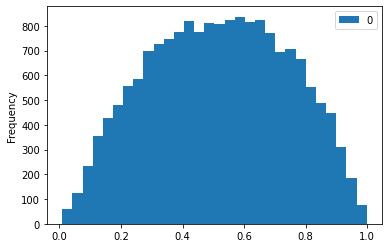

In [ ]:
proba_F.plot.hist(bins=30)

# ОТЧЕТ - Логистическая Регрессия



**1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?**

Качество на исходноыми данными, достигнутое логистической регрессией - 0.716,
при затраченном времени - 6.15 секунд.
Максимальное качество, достигнутое на градиентном бустинге (30 деревьев) - 0.689,
при затраченном времени -  2 минуты 55 секунд.
Эффективная работа логистической регрессии объясняется линейными зависимостями внутри данных, а также предварительным масштабированием признаков. 
Алгоритм логистической регрессии работает существенно быстрее, в силу его линейности: число параметров равно числу признаков.

**2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?**

Без категориальных данных качество классификации осталось тем же - 0.716,
т. к. эти признаки не несли полезной информации для алгоритма

**3. Сколько различных идентификаторов героев существует в данной игре?**

112

**4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?**
Кодирование категориальных данных помогает увеличить качество алгоритма с 0.716 до 0.752.
Алгоритм извлекает больше информации из кодированных признаков об относительной эффективности героев.

**5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?**

минимальное: 0.009388
максимальное: 0.998338
